Saving student_scores.csv to student_scores.csv
   Hours  Scores
0   7.74    98.6
1   4.39    55.4
2   8.59    84.8
3   6.97    80.7
4   0.94    29.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   120 non-null    float64
 1   Scores  120 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB
None
            Hours      Scores
count  120.000000  120.000000
mean     4.987333   61.747500
std      2.737745   23.586291
min      0.070000   17.300000
25%      2.705000   40.775000
50%      4.705000   63.650000
75%      7.277500   80.175000
max      9.760000  100.000000


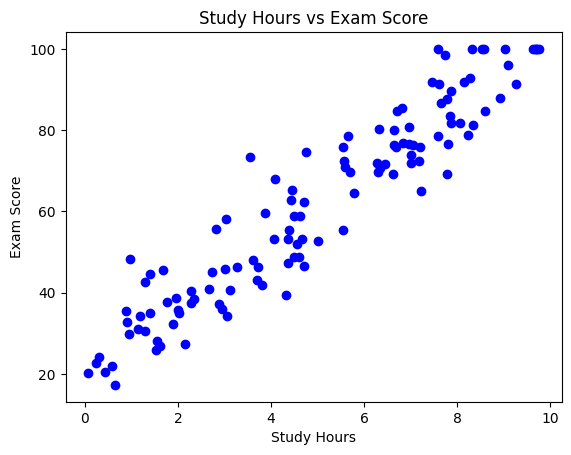

Mean Squared Error: 49.99354637225525
R² Score: 0.9231016378276543


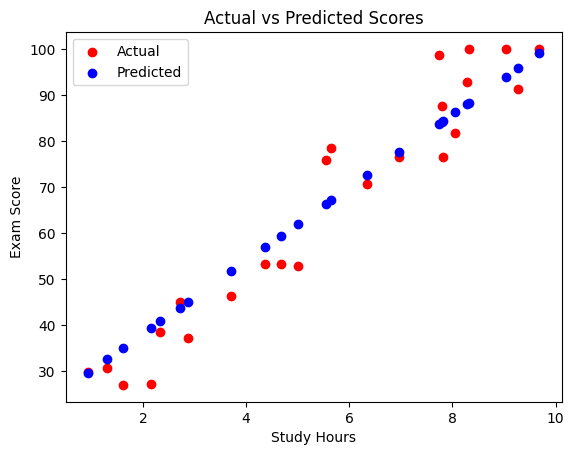

Polynomial MSE: 49.469815467325596
Polynomial R²: 0.9239072227827252


In [2]:
# Step 1: Install dependencies (Colab usually has them pre-installed)
!pip install pandas matplotlib scikit-learn

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 3: Load dataset in Colab
from google.colab import files
uploaded = files.upload()  # Upload the student_scores.csv file you downloaded

df = pd.read_csv("student_scores.csv")

# Step 4: Explore data
print(df.head())
print(df.info())
print(df.describe())

# Step 5: Visualization
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.show()

# Step 6: Data Cleaning
df = df.dropna()

# Step 7: Split data
X = df[['Hours']]  # features
y = df['Scores']   # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 11: Visualize predictions
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Actual vs Predicted Scores')
plt.legend()
plt.show()

# Bonus: Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_poly_pred = poly_model.predict(X_test_poly)

print("Polynomial MSE:", mean_squared_error(y_test, y_poly_pred))
print("Polynomial R²:", r2_score(y_test, y_poly_pred))
